In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from sklearn.datasets import load_iris
from lightgbm import LGBMRegressor
from category_encoders import OrdinalEncoder
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [5]:
#imports dataset
df = pd.read_csv("H:\\bank-full.csv")
af = pd.DataFrame()

In [17]:
#Decision Tree
pd.options.mode.chained_assignment = None  # default='warn'
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result: \n==========================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report:  \n \tPrecision: {precision_score(y_train, pred)}\n \tRecall Score: {recall_score(y_train, pred)}")
        print(f"Confusion Matrix: {confusion_matrix(y_train, clf.predict(X_train))}")
    elif train == False:
        print("Test Result: \n==========================================")
        pred = clf.predict(X_test)
        print(f"Accuracy Score: {accuracy_score(y_test, pred):.4f}\n")
        print(f"Classification Report:  \n \tPrecision: {precision_score(y_test, pred)}\n \tRecall Score: {recall_score(y_test, pred)}")
        print(f"Confusion Matrix: {confusion_matrix(y_test, pred)}")
    
inputs = df[["age", "job", "marital", "education", "default", "housing", "loan", "poutcome"]]
target = df['y']

In [9]:
inputs['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
pd.get_dummies(inputs, columns=['job']).head()

,age,marital,education,default,housing,loan,poutcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,yes,no,unknown,0,0,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,yes,no,unknown,0,0,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,yes,yes,unknown,0,0,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,yes,no,unknown,0,1,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,no,no,unknown,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
X_encoded = pd.get_dummies(inputs, columns=['job', "marital", "education", "default", "housing", "loan", "poutcome"])
X_encoded.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,44,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,33,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,47,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,33,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [44]:
le_y = LabelEncoder()
inputs['y_n'] = le_y.fit_transform(df['y'])
target = inputs['y_n']
X_encoded.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,44,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,33,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,47,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,33,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [37]:
target.unique()
#Y_encoded = pd.get_dummies(target, columns=['y']).head()
#Y_encoded.head()

array([0, 1])

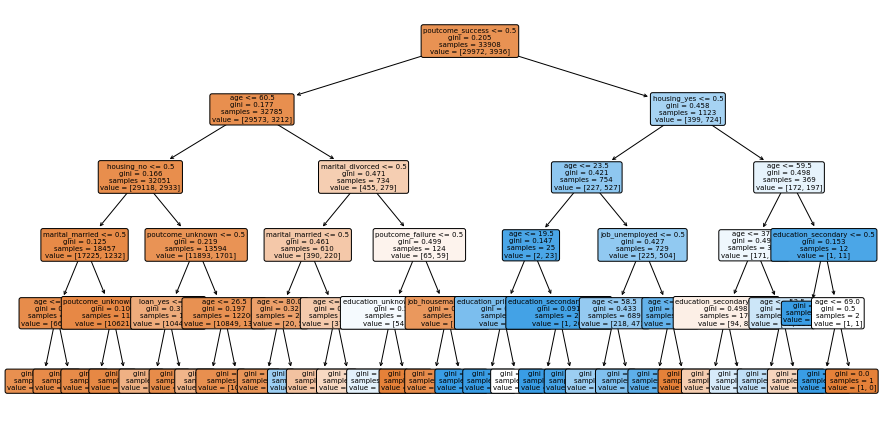

In [76]:
#pd.get_dummies(target, columns=['y']).head()
#Training and Testing our data set for Accuracy, Classification, Precision, Recall Score, and Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X_encoded, target, random_state=42)

clf = tree.DecisionTreeClassifier(max_depth = 5, random_state=42)
clf = clf.fit(X_train, y_train)

#print_score(clf, X_train,y_train, X_test, y_test, train=True)
#print_score(clf, X_train,y_train, X_test, y_test, train=False)

plt.figure(figsize=(15, 7.5))
tree.plot_tree(clf, filled=True, rounded = True, feature_names=X_encoded.columns, fontsize=(7));

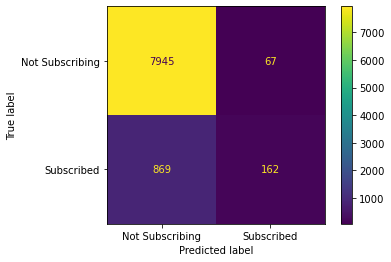

In [59]:
#plotting confusion matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels=["Not Subscribing", "Subscribed"])

In [77]:
path = clf.cost_complexity_pruning_path(X_train, y_train) #Determines values for alpha
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]#Excludes maxmimum value for alpha
clf_two = []

In [78]:
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clf_two.append(clf)

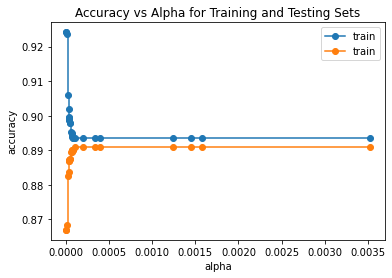

In [80]:
train_scores = [clf.score(X_train, y_train) for clf in clf_two]
test_scores = [clf.score(X_test, y_test) for clf in clf_two]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='train', drawstyle='steps-post')
ax.legend()
plt.show()

In [81]:
print_score(clf, X_train,y_train, X_test, y_test, train=True)
print_score(clf, X_train,y_train, X_test, y_test, train=False)

Train Result: 
Accuracy Score: 0.8935

Classification Report:  
 	Precision: 0.6447016918967052
 	Recall Score: 0.1839430894308943
Confusion Matrix: [[29573   399]
 [ 3212   724]]
Test Result: 
Accuracy Score: 0.8909

Classification Report:  
 	Precision: 0.654639175257732
 	Recall Score: 0.1877309682187731
Confusion Matrix: [[9816  134]
 [1099  254]]


<AxesSubplot:xlabel='alpha'>

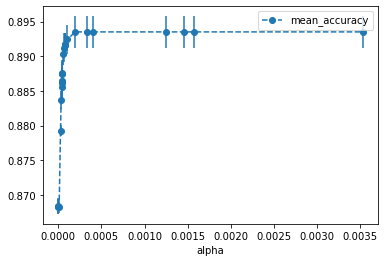

In [92]:
#Cross Validation for finding the Best Alpha
alpha_loop_values = []

#Finding each candidate value for alphas using 5-fold cross validation
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle = '--')

In [99]:
alpha_results[(alpha_results['alpha']> 0.0003) & (alpha_results['alpha']< 0.00035)]

,alpha,mean_accuracy,std
19,0.000337,0.893506,0.002256


In [102]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']> 0.0003) & (alpha_results['alpha']< 0.00035)] ['alpha']
ideal_ccp_alpha

19    0.000337
Name: alpha, dtype: float64

In [105]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.00033728031016496546

In [114]:
clf_pruned = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_pruned = clf_prunned.fit(X_train, y_train)

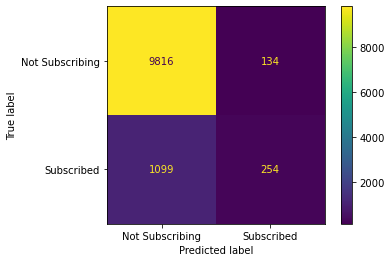

In [115]:
plot_confusion_matrix(clf_pruned, X_test, y_test, display_labels= ["Not Subscribing", "Subscribed"])

Went from 0.9916 or 99% to 0.9865 or 99% rounded

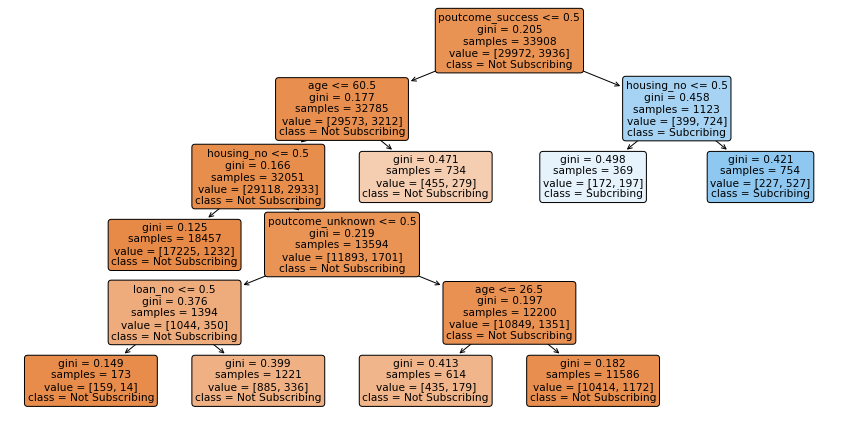

In [117]:
plt.figure(figsize=(15,7.5))
tree.plot_tree(clf_pruned, filled=True, rounded=True, class_names=["Not Subscribing","Subcribing"], feature_names = X_encoded.columns);